In [105]:
using LinearAlgebra #Manipulacion de Matrices
#using Gadfly  
using Plots #Graficacion
using StaticArrays 
using SparseArrays 
using Arpack  #Obtencion de Eigenvalores
#using JeszenszkiBasis #Generar una base
#Variables globales N,M,D
global N=4
global M=4
global D=Int((factorial(M+N-1))/(factorial(M-1)*factorial(N))) 
#funcion primos 
p(i)=100i+3
#Generamos la base en orden lexicografico para N=M=3 
v = []
for n1 in 0:N  
    for n2 in 0:(N-n1)  
        for n3 in 0:(N-n1-n2)  
            for n4 in 0:(N-n1-n2-n3)
            if n1+n2+n3+n4 != N
                continue 
            end
            pushfirst!(v, [n1,n2,n3,n4])  
            end
        end
    end
end    
#v = Szbasis(M, N)  

In [106]:
v

35-element Vector{Any}:
 [4, 0, 0, 0]
 [3, 1, 0, 0]
 [3, 0, 1, 0]
 [3, 0, 0, 1]
 [2, 2, 0, 0]
 [2, 1, 1, 0]
 [2, 1, 0, 1]
 [2, 0, 2, 0]
 [2, 0, 1, 1]
 [2, 0, 0, 2]
 [1, 3, 0, 0]
 [1, 2, 1, 0]
 [1, 2, 0, 1]
 ⋮
 [0, 2, 2, 0]
 [0, 2, 1, 1]
 [0, 2, 0, 2]
 [0, 1, 3, 0]
 [0, 1, 2, 1]
 [0, 1, 1, 2]
 [0, 1, 0, 3]
 [0, 0, 4, 0]
 [0, 0, 3, 1]
 [0, 0, 2, 2]
 [0, 0, 1, 3]
 [0, 0, 0, 4]

In [111]:
function tag(b,M)
    tag=0;
    for i in 1:M
        tag += (√p(i))*b[i] 
    end
    return tag 
end

tag (generic function with 1 method)

In [112]:
function creation_ann(k,j,v)     
    if(v[j] >= 1) 
        b = copy(v)
        value = sqrt(((b[k])+1)*b[j])
        b[j] -= 1; 
        b[k] += 1;    
        return [value , b]   
    else 
        return 0; 
    end 
end   

creation_ann (generic function with 1 method)

In [113]:
function matrixofcreationann(i,k)
    mat = spzeros(D,D)
    for j in 1:D 
        if creation_ann(i,k,v[j]) == 0 
           continue      
        end
        mat[DictOfInds[tag(creation_ann( i, k , v[j] )[2],M)], j] = creation_ann(i, k , v[j])[1] 
    end   
    #return rot180(mat)  
    return mat
end

matrixofcreationann (generic function with 1 method)

In [114]:
#Valores de la diagonal de los numeros de ocupacion
function valdiags(k, v, M)  
    if(v[k] >= 1)  
        return  (v[k]*(v[k]-1))/2  
    else 
        return 0;
    end  
end       

valdiags (generic function with 1 method)

In [115]:
function occupation(i, v) 
     if(v[i] >= 1)  
        return  v[i]  
    else 
        return 0;
    end  
end       

occupation (generic function with 1 method)

In [116]:
function matrixoccupation(k, D) 
    mat = spzeros(D,D)
    for j in 1:D 
        mat[j,j] = occupation(k, v[j]) 
    end   
    return mat 
end

matrixoccupation (generic function with 1 method)

In [117]:
println(v[2])

[3, 1, 0, 0]


In [118]:
matrixoccupation(1,D)

35×35 SparseMatrixCSC{Float64, Int64} with 20 stored entries:
⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀

In [119]:
#Array de tags 
T = []
for i in 1:length(v) 
     push!(T,  tag( v[i] , M )) 
end

In [120]:
#Ordenamos y hacemos un diccionario Tsorted => indices
inds = sortperm(T);
Tsorted = T[inds];
#DictOfInds = Dict(zip(Tsorted, inds)) 
DictOfInds = Dict(Tsorted .=> inds)

Dict{Float64, Int64} with 35 entries:
  52.8923 => 11
  57.7795 => 9
  56.0514 => 12
  60.1503 => 22
  56.9912 => 21
  72.2955 => 32
  74.9635 => 33
  61.8785 => 15
  74.4724 => 30
  65.9774 => 25
  40.5956 => 1
  67.7055 => 19
  48.7934 => 5
  71.8044 => 29
  62.8183 => 23
  80.2994 => 35
  77.6315 => 34
  50.5215 => 4
  66.4685 => 27
  44.6945 => 2
  47.8536 => 3
  63.3094 => 24
  59.2105 => 14
  69.6276 => 31
  62.3696 => 17
  ⋮       => ⋮

Any[6.0, 3.0, 3.0, 3.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 3.0, 1.0, 1.0, 1.0, 0.0, 1.0, 3.0, 1.0, 1.0, 3.0, 6.0, 3.0, 3.0, 2.0, 1.0, 2.0, 3.0, 1.0, 1.0, 3.0, 6.0, 3.0, 2.0, 3.0, 6.0]


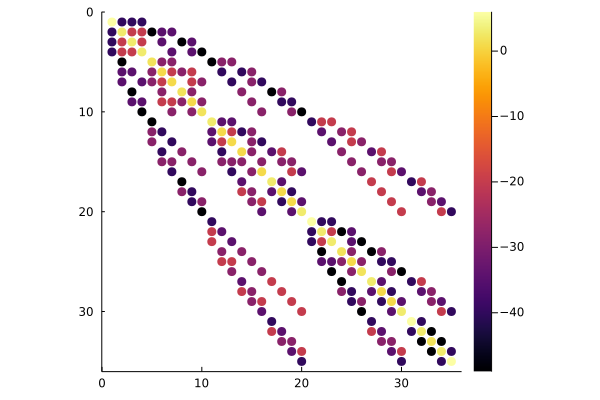

In [157]:
#for t in 1:10
#    J=10
#    U=t*J*0.1 
#obtener H_int 
diagscomp = [];
for j in 1:D 
    sumsdeocup = []; 
    for k in 1:M
        push!(sumsdeocup, valdiags(k, v[j], M))
    end  
    push!(diagscomp, sum(sumsdeocup))    
end   
#Mostramos la parte  
println(diagscomp)
Hint = spzeros(D,D)
Hint[diagind(Hint)] = diagscomp; Hint 
#println(Hint)
#Hint=diagm(diagscomp) 
#spy(Hint) 
J = 20
Hkin = spzeros(D,D)
for j in 1:D
        for k in 1:M 
            for h in 1:M   
                if k == h 
                    break 
                elseif creation_ann(k,h,v[j]) == 0 
                    continue 
                else 
                     Hkin[DictOfInds[tag(creation_ann( k, h , v[j] )[2],M)], j] = -J*(creation_ann( k, h , v[j])[1])     
                end
            end 
        end  
    end  
Hkin = Symmetric(Hkin, :L)
#println(Hkin)  
#spy(Hkin)

H=Hkin+Hint
spy(H, markersize = 5)

In [150]:
Eval, Evec = eigs(H , nev=2 , which=:SR)

([-238.5069662617429, -157.76502856415712], [0.06077550945174073 -0.02878631248349961; 0.12383362865880838 -0.005375329065615747; … ; 0.12383362865880844 0.11527196876462718; 0.06077550945174073 0.1366573044112528], 2, 2, 37, [-0.011956082453750174, 0.024165336839095254, 0.00544572403820019, -0.024684762314525793, 0.05026054034020689, 0.007636372422274416, 0.04003393683573034, -0.00287361840426972, -0.027093554801799025, -0.027769213108914368  …  -0.07679048763924388, -0.03438750292569513, 0.016344027357138996, 0.02038754132827707, -0.051979942877350624, 0.0009070506240221832, 0.03614460156470621, 0.07704296772880045, 0.0645107118459715, 0.016059845938994014])

In [151]:
H

35×35 SparseMatrixCSC{Float64, Int64} with 274 stored entries:
⣿⣿⠲⡢⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠸⡢⢿⢗⡦⠙⢕⠦⣀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠙⣌⠋⠛⣤⣄⡑⠈⠓⢤⢄⡀⠀⠀⠀⠀⠀
⠀⠀⠱⡕⢄⠹⡵⣫⠲⣄⠀⠑⢍⠲⣄⠀⠀⠀
⠀⠀⠀⠘⢦⠀⠘⢦⠻⣦⠀⠀⠀⠑⢄⠙⢦⡀
⠀⠀⠀⠀⠀⢗⢄⠀⠀⠀⢿⢗⡦⣀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠈⢣⡑⢄⠀⠈⢫⡛⣬⡓⢤⡀⠀
⠀⠀⠀⠀⠀⠀⠀⠙⣄⠑⠀⠀⠙⣌⠛⣤⡙⠂
⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⠀⠀⠀⠈⠳⠈⠻⠆

In [152]:
G = Evec[:,1] 

35-element Vector{Float64}:
 0.06077550945174073
 0.12383362865880838
 0.1238336286588084
 0.12383362865880843
 0.15260810310521833
 0.2171714409872346
 0.21717144098723465
 0.15260810310521836
 0.2171714409872346
 0.15260810310521825
 0.12383362865880836
 0.2171714409872347
 0.21717144098723465
 ⋮
 0.15260810310521838
 0.21717144098723462
 0.15260810310521852
 0.1238336286588084
 0.21717144098723457
 0.21717144098723462
 0.12383362865880845
 0.0607755094517407
 0.12383362865880844
 0.15260810310521844
 0.12383362865880844
 0.06077550945174073

In [153]:
SPDM = spzeros(M,M) 
for k in 1:M 
    for h in 1:M   
        if k == h 
            SPDM[k , k] = dot(G, matrixoccupation(k,D)*G) 
        else  
            t = matrixofcreationann(k,h)*G
            SPDM[k , h] = dot(G,t)  
        end
    end  
end   
SPDM = Symmetric(SPDM, :L)

4×4 Symmetric{Float64, SparseMatrixCSC{Float64, Int64}}:
 1.0       0.999971  0.999971  0.999971
 0.999971  1.0       0.999971  0.999971
 0.999971  0.999971  1.0       0.999971
 0.999971  0.999971  0.999971  1.0

In [154]:
EvalSPDM, EvecSPDM = eigs(SPDM , nev=1)

([3.999913722637661], [-0.4999999999999999; -0.4999999999999999; -0.4999999999999999; -0.5], 1, 1, 4, [0.0, 0.0, 0.0, 0.0])

In [156]:
EvalSPDM

1-element Vector{Float64}:
 3.999913722637661

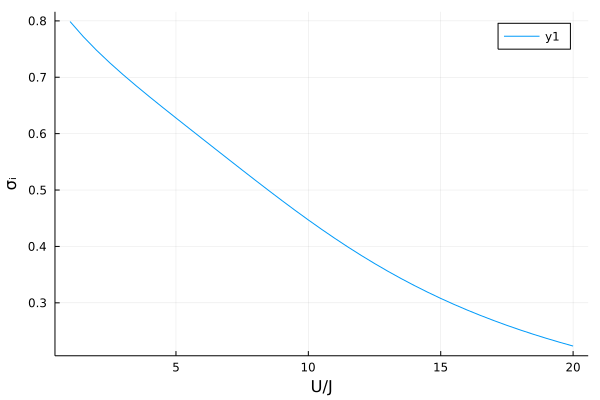

In [148]:
fconde = Vector{Float64}() 
variance = Vector{Float64}()  
correlation = Vector{Float64}() 
for t in 1:0.5:20
    J=10
    U=t*J
    diagscomp = [];
    for j in 1:D 
        sumsdeocup = []; 
        for k in 1:M
        push!(sumsdeocup, valdiags(k, v[j], M))
        end  
        push!(diagscomp, sum(sumsdeocup))    
    end    
    Vals = U*diagscomp
    Hint = spzeros(D,D)
    Hint[diagind(Hint)] = Vals; Hint 
    Hkin = spzeros(D,D)
    firstcolumn = [] 
    for j in 1:D
        for k in 1:M 
            for h in 1:M   
                if k == h 
                    break 
                elseif creation_ann(k,h,v[j]) == 0 
                    continue 
                else 
                     Hkin[DictOfInds[tag(creation_ann( k, h , v[j] )[2],M)], j] = -J*(creation_ann( k, h , v[j])[1])     
                end
            end 
        end  
    end  
    Hkin = Symmetric(Hkin, :L)  
    H=Hkin+Hint  
    Eval, Evec = eigs(H,nev=2,which=:SR, v0 = ones(D))   
    G = Evec[:,1]
    SPDM = spzeros(M,M) 
    for k in 1:M 
        for h in 1:M   
            if k == h 
                SPDM[k , k] = dot(G, matrixoccupation(k,D)*G) 
            else  
                t = matrixofcreationann(k,h)*G
                SPDM[k , h] = dot(G,t)  
            end
        end  
    end   
    SPDM = Symmetric(SPDM, :L)
    EvalSPDM, EvecSPDM = eigs(SPDM , nev=1, which =:LR, v0=ones(M))    
    push!(fconde, real(EvalSPDM[1])/N)   
    #Correlacion  
    #push!(correlation, dot(G, matrixofcreationann(1 ,floor(M/2) )*G )) 
    #Varianza 
    v1 = matrixoccupation(4,D)
    v2 = matrixoccupation(4,D)^2
    push!(variance, sqrt(dot(G, v2*G) - (dot(G, v1*G))^2)) 
end       
t = 1:0.5:20
#plot(t,fconde, xlabel = "U/J", ylabel= "f_c")
plot(t,variance, xlabel = "U/J", ylabel= "σᵢ") 
#plot(t, correlation, xlabel = "U/J", ylabel = "ρ⁽¹⁾")

In [110]:
fconde = Vector{Float64}() 
variance = Vector{Float64}()  
correlation = Vector{Float64}() 
for t in 1:0.5:20
    J=10
    U=t*J
    diagscomp = [];
    for j in 1:D 
        sumsdeocup = []; 
        for k in 1:M
        push!(sumsdeocup, valdiags(k, v[j], M))
        end  
        push!(diagscomp, sum(sumsdeocup))    
    end    
    Vals = U*diagscomp
    Hint = spzeros(D,D)
    Hint[diagind(Hint)] = Vals; Hint 
    Hkin = spzeros(D,D)
    firstcolumn = [] 
    for j in 1:D
        for k in 1:M 
            for h in 1:M   
                if k == h 
                    break 
                elseif creation_ann(k,h,v[j]) == 0 
                    continue 
                else 
                     Hkin[DictOfInds[tag(creation_ann( k, h , v[j] )[2],M)], j] = -J*(creation_ann( k, h , v[j])[1])     
                end
            end 
        end  
    end  
    Hkin = Symmetric(Hkin, :L)  
    H=Hkin+Hint  
    Eval, Evec = eigs(H,nev=2,which=:SR, v0 = ones(D))   
    G = Evec[:,1]
    SPDM = spzeros(M,M) 
    for k in 1:M 
        for h in 1:M   
            if k == h 
                SPDM[k , k] = dot(G, matrixoccupation(k,D)*G) 
            else  
                t = matrixofcreationann(k,h)*G
                SPDM[k , h] = dot(G,t)  
            end
        end  
    end   
    SPDM = Symmetric(SPDM, :L)
    EvalSPDM, EvecSPDM = eigs(SPDM , nev=1)    
    push!(fconde, real(EvalSPDM[1])/N)   
    #Correlacion  
#   push!(correlation, dot(G, matrixofcreationann(1 ,floor(M/2) )*G )) 
    #Varianza 
    v1 = matrixoccupation(3,D)
    v2 = matrixoccupation(3,D)^2
    push!(variance, sqrt(dot(G, v2*G) - (dot(G, v1*G))^2)) 
end       
t = 1:0.5:20
#plot(t,fconde, xlabel = "U/J", ylabel= "f_c")
plot(t,variance, xlabel = "U/J", ylabel= "σ") 
#plot(t, correlation, xlabel = "U/J", ylabel = "ρ⁽¹⁾")

LoadError: KeyError: key 44.69448154405166 not found

In [33]:
matrixofcreationann(3,3)

10×10 SparseMatrixCSC{Float64, Int64} with 6 stored entries:
  ⋅    ⋅    ⋅        ⋅    ⋅        ⋅        ⋅    ⋅        ⋅        ⋅ 
  ⋅    ⋅    ⋅        ⋅    ⋅        ⋅        ⋅    ⋅        ⋅        ⋅ 
  ⋅    ⋅   1.41421   ⋅    ⋅        ⋅        ⋅    ⋅        ⋅        ⋅ 
  ⋅    ⋅    ⋅        ⋅    ⋅        ⋅        ⋅    ⋅        ⋅        ⋅ 
  ⋅    ⋅    ⋅        ⋅   1.41421   ⋅        ⋅    ⋅        ⋅        ⋅ 
  ⋅    ⋅    ⋅        ⋅    ⋅       2.44949   ⋅    ⋅        ⋅        ⋅ 
  ⋅    ⋅    ⋅        ⋅    ⋅        ⋅        ⋅    ⋅        ⋅        ⋅ 
  ⋅    ⋅    ⋅        ⋅    ⋅        ⋅        ⋅   1.41421   ⋅        ⋅ 
  ⋅    ⋅    ⋅        ⋅    ⋅        ⋅        ⋅    ⋅       2.44949   ⋅ 
  ⋅    ⋅    ⋅        ⋅    ⋅        ⋅        ⋅    ⋅        ⋅       3.4641

In [282]:
creation_ann(2,3,v[10])

2-element Vector{Any}:
 1.7320508075688772
  [0, 1, 2]

In [298]:
v[8]

3-element Vector{Int64}:
 0
 2
 1

In [293]:
v3 = Szbasis(M, N)  

Szbasis(3, 3, 10, [3 2 … 0 0; 0 1 … 1 0; 0 0 … 2 3])

In [303]:
to_str(v3[5])

"2 0 1"